# Supernova distances and redshift

In [4]:
import numpy as np
import pylab as plt
from matplotlib import pyplot as plt

(35.0, 50.0)

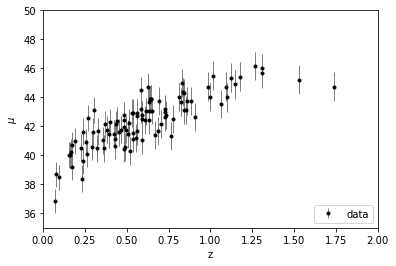

In [5]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### Linear regression

#### not taking care of errors

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(z_sample[:, np.newaxis], mu_sample, sample_weight = (1/dmu)**2)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
#y_pred2 = lin_reg.predict(X_new)

39.483846022957295 [4.76438865]


#### make  a new prediction

In [31]:
def mu_fit(x): 
    return  theta0 + theta1 * x

(35.0, 50.0)

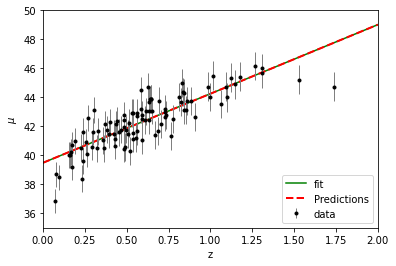

In [42]:
z_grid = np.linspace(0,2,1000)
plt.plot(z_grid, mu_fit(z_grid), color = 'g', label = 'fit')
 
plt.plot(z_grid, lin_reg.predict(z_grid[:, np.newaxis]), "r--", linewidth=2, label="Predictions")

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### Polynomial regression

In [54]:
from astroML.linear_model import PolynomialRegression


degree = 3
pol_reg = PolynomialRegression(degree) # fit 3rd degree polynomial
pol_reg.fit(z_sample[:, np.newaxis], mu_sample, dmu)# sample_weight = (1/dmu)**2)



print(pol_reg.coef_)

[38.36452837  8.87820312 -3.06677777  0.17557977]


(35.0, 50.0)

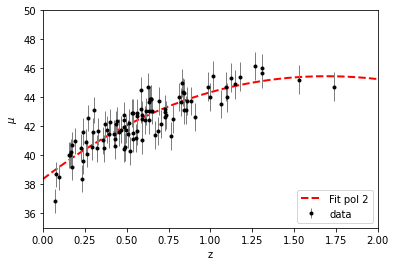

In [55]:
n_constraints = degree + 1

z_grid = np.linspace(0,2,1000)
mu_pred_pol = pol_reg.predict(z_grid[:, np.newaxis])
plt.plot(z_grid, mu_pred_pol, "r--", linewidth=2, label="Fit pol 2")

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

## let's make the polynomial fit for several grades

(35.0, 50.0)

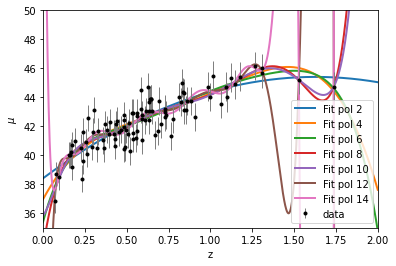

In [69]:
degree = np.arange(2, 16, 2)


for i in degree: 
    pol_reg = PolynomialRegression(i) # fit 3rd degree polynomial
    pol_reg.fit(z_sample[:, np.newaxis], mu_sample, dmu)# sample_weight = (1/dmu)**2)
    mu_pred_pol = pol_reg.predict(z_grid[:, np.newaxis])
    plt.plot(z_grid, mu_pred_pol , linewidth=2, label="Fit pol " +str(i))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)


By intuition the best is the 4-th degree polynomial, below (degree << 4) I'm underfitting, above (degree >> 4) I'm overfitting

# Cross-Validation

## Linear Regression

In [95]:
from sklearn.model_selection import train_test_split

z_train, z_test, mu_train, mu_test, dmu_train, dmu_test = train_test_split(z_sample, mu_sample, dmu, test_size=0.3, random_state=42)

In [96]:
def error(X,Y,model):
    return np.sqrt(np.sum((Y-model.predict(X)) ** 2)/ len(X))

def fitanderror(model):
    model.fit(z_train[:, np.newaxis], mu_train,dmu_train)
    error_train = error(z_train[:, np.newaxis],mu_train ,model)
    error_validation  = error(z_test[:, np.newaxis], mu_test, model)
    return error_train, error_validation

In [97]:
error_train, error_validation = fitanderror(lin_reg)
print("Linear Regression", error_train, error_validation)

Linear Regression 1.0477622048766246 0.8270709249246136


## Polynomial regression

Polynomial Regression n= 2 0.9385359114081165 0.8351995054159935
Polynomial Regression n= 3 0.9383899628086956 0.835411172564148
Polynomial Regression n= 4 0.9024072712440718 0.8095703348999895
Polynomial Regression n= 5 0.8924469328124858 0.8143335829739315
Polynomial Regression n= 6 0.8905028171949888 0.8113859054713938
Polynomial Regression n= 7 0.869955968482535 0.8163407910202461
Polynomial Regression n= 8 0.8695867558752269 0.8211204495393606
Polynomial Regression n= 9 0.8696086089173872 0.8218234526944245
Polynomial Regression n= 10 0.8666795023356573 0.8463777347900516
Polynomial Regression n= 11 0.8624581177651772 0.851366872429881
Polynomial Regression n= 12 0.8558274204988271 0.8191597622470962
Polynomial Regression n= 13 0.8528955473462736 0.8247869524747441
Polynomial Regression n= 14 0.8407660059579644 0.812159561424625
Polynomial Regression n= 15 0.8383792971436322 0.8271918289233751
Best 4 0.8095703348999895


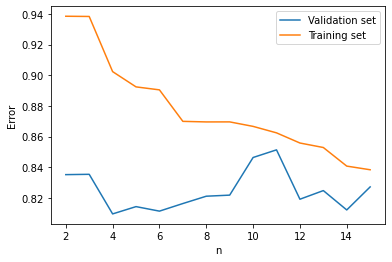

In [105]:
etrain = []
etest = []
degree = np.arange(2, 16, 1)

for i in degree: 
    pol_reg = PolynomialRegression(i) # fit 3rd degree polynomial
    error_train, error_validation = fitanderror(pol_reg)
    print("Polynomial Regression n=",i, error_train, error_validation)
    etrain.append(error_train)
    etest.append(error_validation)
    
plt.plot(degree,etest, label='Validation set')
plt.plot(degree,etrain, label='Training set')

plt.xlabel('n')
plt.ylabel('Error')
plt.legend()

print("Best", degree[np.argmin(etest)], min(etest))

(35.0, 50.0)

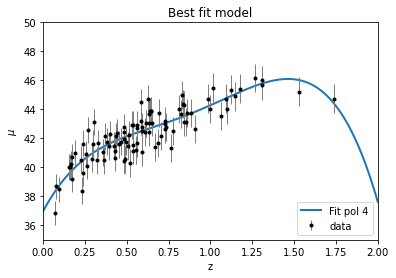

In [110]:
pol_reg = PolynomialRegression(degree[np.argmin(etest)]) # fit 3rd degree polynomial
pol_reg.fit(z_sample[:, np.newaxis], mu_sample, dmu)# sample_weight = (1/dmu)**2)
mu_pred_pol = pol_reg.predict(z_grid[:, np.newaxis])
plt.plot(z_grid, mu_pred_pol , linewidth=2, label="Fit pol " +str(degree[np.argmin(etest)]))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Best fit model')
plt.xlim(0,2)
plt.ylim(35,50)
